In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Healthcare Hackers"
%cd /content/gdrive/My Drive/Healthcare Hackers

/content/gdrive/My Drive/Healthcare Hackers


In [10]:
%ls

diabetes.csv  kaggle.json  original_diabetes.csv


In [6]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 1.15MB/s]


In [8]:
!unzip \*.zip  && rm *.zip

Archive:  pima-indians-diabetes-database.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: original_diabetes.csv
  inflating: original_diabetes.csv   


In [11]:
import pandas as pd #this imports pandas as pd to shorten function calls
print(pd.__version__)

1.1.5


In [42]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [43]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

from sklearn.model_selection import train_test_split

In [46]:
mini_df = df[['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Outcome']]  
mini_df

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,33.6,0.627,1
1,1,85,26.6,0.351,0
2,8,183,23.3,0.672,1
3,1,89,28.1,0.167,0
4,0,137,43.1,2.288,1
...,...,...,...,...,...
763,10,101,32.9,0.171,0
764,2,122,36.8,0.340,0
765,5,121,26.2,0.245,0
766,1,126,30.1,0.349,1


In [47]:
mini_df.isnull()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Outcome
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
763,False,False,False,False,False
764,False,False,False,False,False
765,False,False,False,False,False
766,False,False,False,False,False


In [48]:
mini_df.isnull().sum(axis = 0) 


Pregnancies                 0
Glucose                     0
BMI                         0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64

In [49]:
temp_df = mini_df[mini_df['BMI'] == 0]
#temp_df
temp_df[temp_df.columns[0]].count()

11

Thus, the data frame has 11 people whose BMI == 0, which is not possible

In [50]:
df[df.columns[0]].count()

768

In [58]:
cleaned_df = mini_df[mini_df['BMI'] != 0]
cleaned_df

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,33.6,0.627,1
1,1,85,26.6,0.351,0
2,8,183,23.3,0.672,1
3,1,89,28.1,0.167,0
4,0,137,43.1,2.288,1
...,...,...,...,...,...
763,10,101,32.9,0.171,0
764,2,122,36.8,0.340,0
765,5,121,26.2,0.245,0
766,1,126,30.1,0.349,1


In [59]:
cleaned_df[cleaned_df.columns[0]].count()

757

This works towards cleaning up the data


In [60]:
cleaned_df.dropna().count()

Pregnancies                 757
Glucose                     757
BMI                         757
DiabetesPedigreeFunction    757
Outcome                     757
dtype: int64

New category creation

In [61]:
cleaned_df['Glucose weighted BMI'] = cleaned_df['Glucose']*cleaned_df['BMI']
cleaned_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Outcome,Glucose weighted BMI
0,6,148,33.6,0.627,1,4972.8
1,1,85,26.6,0.351,0,2261.0
2,8,183,23.3,0.672,1,4263.9
3,1,89,28.1,0.167,0,2500.9
4,0,137,43.1,2.288,1,5904.7
...,...,...,...,...,...,...
763,10,101,32.9,0.171,0,3322.9
764,2,122,36.8,0.340,0,4489.6
765,5,121,26.2,0.245,0,3170.2
766,1,126,30.1,0.349,1,3792.6


In [62]:
cleaned_df['DPF weighted BMI'] = cleaned_df['DiabetesPedigreeFunction']*cleaned_df['BMI']
cleaned_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Outcome,Glucose weighted BMI,DPF weighted BMI
0,6,148,33.6,0.627,1,4972.8,21.0672
1,1,85,26.6,0.351,0,2261.0,9.3366
2,8,183,23.3,0.672,1,4263.9,15.6576
3,1,89,28.1,0.167,0,2500.9,4.6927
4,0,137,43.1,2.288,1,5904.7,98.6128
...,...,...,...,...,...,...,...
763,10,101,32.9,0.171,0,3322.9,5.6259
764,2,122,36.8,0.340,0,4489.6,12.5120
765,5,121,26.2,0.245,0,3170.2,6.4190
766,1,126,30.1,0.349,1,3792.6,10.5049


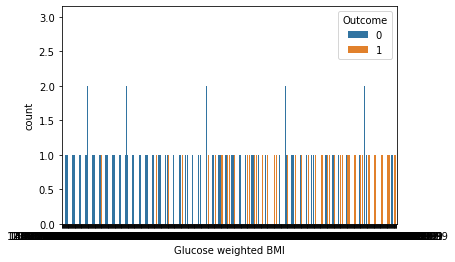

In [66]:
sns.countplot(x='Glucose weighted BMI',data=cleaned_df,hue='Outcome') #,palette="rocket")

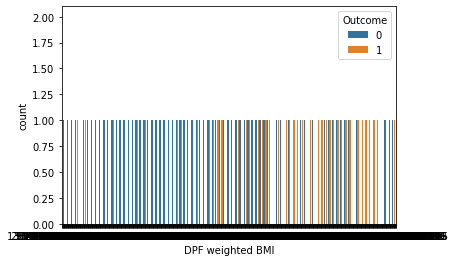

In [65]:
sns.countplot(x='DPF weighted BMI',data=cleaned_df,hue='Outcome')

In [67]:
cleaned_df['GWeightedBMI weighted DPFWeightedBMI'] = cleaned_df['Glucose weighted BMI']*cleaned_df['DPF weighted BMI']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


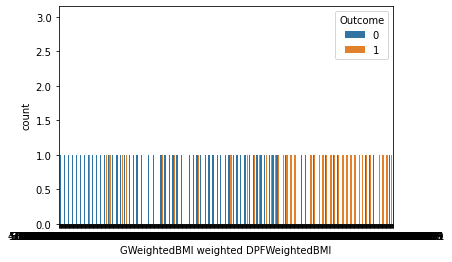

In [68]:
sns.countplot(x='GWeightedBMI weighted DPFWeightedBMI',data=cleaned_df,hue='Outcome')